In [1]:
#Librerias
import tensorflow as tf
import os
import cv2
import sklearn
import matplotlib.pyplot as plt

Carga de datos

In [93]:
def get_all_files(path):
    items=os.listdir(path)
    files=[os.path.join(path,file) for file in items if os.path.isfile(os.path.join(path,file))]
    return files

def load_files(files_list):
    data=[]
    for file_path in files_list:
        img=cv2.imread(file_path)
        data.append(img)
    return data

In [94]:
vehicles_path="/mnt/d/Repositorios/Deep_Learning/Temas Selectos/P2/CNN/Dataset/archive/data/vehicles"
files=get_all_files(vehicles_path)
non_vehicles_path="/mnt/d/Repositorios/Deep_Learning/Temas Selectos/P2/CNN/Dataset/archive/data/non-vehicles"
non_files=get_all_files(non_vehicles_path)
print(files[0])
print(non_files[0])
class_label_index=[1 for i in range(len(files))]
class_label_index2=[0 for i in range(len(non_files))]
labels=class_label_index+class_label_index2
files=files+non_files

/mnt/d/Repositorios/Deep_Learning/Temas Selectos/P2/CNN/Dataset/archive/data/vehicles/1.png
/mnt/d/Repositorios/Deep_Learning/Temas Selectos/P2/CNN/Dataset/archive/data/non-vehicles/extra1.png


In [95]:
data=[]
print(len(files))
batch_size=len(files)//40
step=0
for i in range(40):
    data+=load_files(files[step:batch_size+step])
    step+=batch_size

17760


Exploración de los Datos


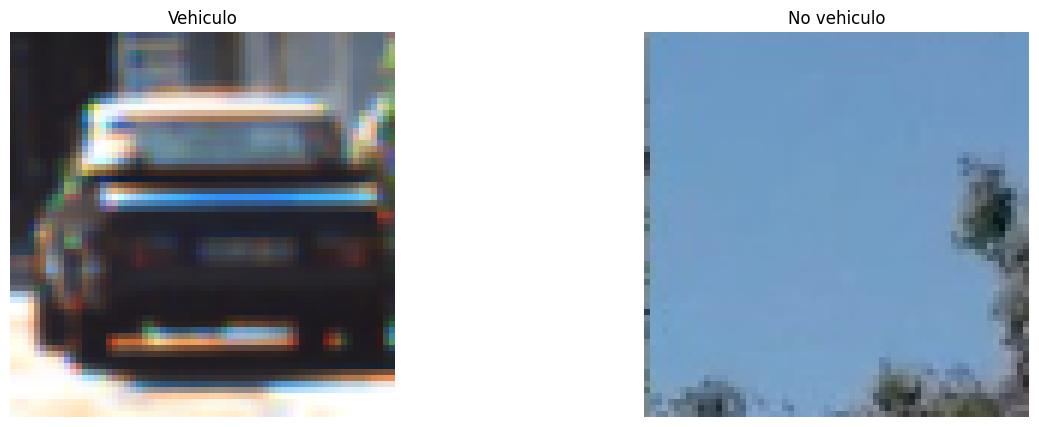

In [96]:
def show_images(image_paths, titles):
    num_images = len(image_paths)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # Ajustar el tamaño de la figura según el número de imágenes
    for i in range(num_images):
        # Cargar la imagen y convertirla a RGB
        image = cv2.cvtColor(cv2.imread(image_paths[i]), cv2.COLOR_BGR2RGB)
        # Mostrar la imagen en la subtrama correspondiente
        axes[i].imshow(image)
        axes[i].axis('off')  # Desactivar los ejes
        axes[i].set_title(titles[i])  # Establecer el título de la subtrama
    plt.show()

# Ejemplo de uso
image_paths = [files[0], non_files[0]]
titles = ['Vehiculo', 'No vehiculo']
show_images(image_paths, titles)

Normalización

In [97]:
print(data[0].shape)


(64, 64, 3)


Model

In [98]:
output_units=1
model=0
model=tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=data[0].shape),
                           tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dense(output_units,activation='sigmoid')
                           
])

In [99]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 6272)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [100]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy']
)

Training


In [101]:
import sklearn.model_selection
import numpy as np
labels=np.array(labels)
data=np.array(data)
print(len(data))
print(len(labels))
X_train,Xtest,ytrain,ytestr=sklearn.model_selection.train_test_split(data,labels,test_size=.2,random_state=42)
print(len(ytestr))
print(len(ytrain))
print(len(X_train))


17760
17760
3552
14208
14208


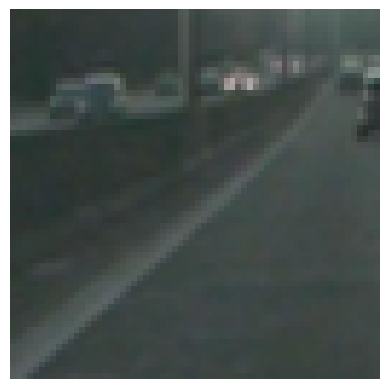

In [102]:
#Convertir datos a tensores
image = cv2.cvtColor(X_train[0], cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()
for image in X_train:
    image=image/255
    image=tf.convert_to_tensor(image,dtype=tf.float32)


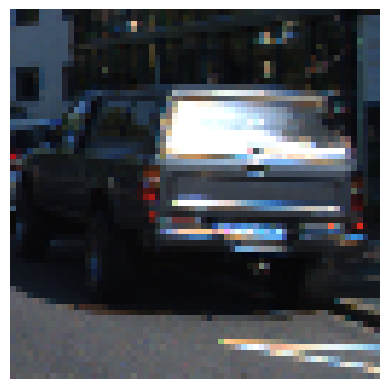

In [103]:
image = cv2.cvtColor(X_train[14000], cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

In [104]:
print(len(ytrain))
print(len(X_train))
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3, mode='min', verbose=1)
history=model.fit(X_train,ytrain,batch_size=1000,epochs=5,callbacks=[early_stopping])

14208
14208
Epoch 1/4
14208/14208 [==============================] - 27s 2ms/step - loss: 0.3524 - accuracy: 0.9250
Epoch 2/4
14208/14208 [==============================] - 26s 2ms/step - loss: 0.1029 - accuracy: 0.9697
Epoch 3/4
14208/14208 [==============================] - 27s 2ms/step - loss: 0.0692 - accuracy: 0.9812
Epoch 4/4
14208/14208 [==============================] - 27s 2ms/step - loss: 0.0593 - accuracy: 0.9861
Epoch 4: early stopping


In [105]:
test_loss, test_acc = model.evaluate(Xtest,ytestr)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

111/111 [==============================] - 1s 1ms/step - loss: 0.1006 - accuracy: 0.9792
Test Loss: 0.1005910336971283
Test Accuracy: 0.9791666865348816


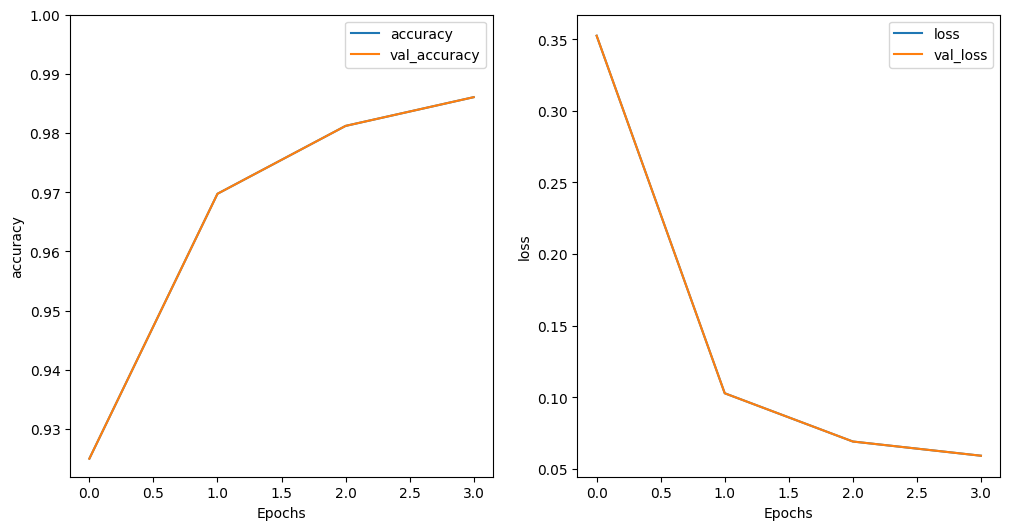

In [110]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history[metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history,'loss')



In [108]:
tf.saved_model.save(model, '/mnt/d/Repositorios/Deep_Learning/Temas Selectos/P2/CNN/model')

INFO:tensorflow:Assets written to: /mnt/d/Repositorios/Deep_Learning/Temas Selectos/P2/CNN/model/assets


INFO:tensorflow:Assets written to: /mnt/d/Repositorios/Deep_Learning/Temas Selectos/P2/CNN/model/assets
